In [0]:
# Mounting google
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Change Directory
cd /content/gdrive/My Drive/face/faceid

/content/gdrive/My Drive/face/faceid


In [0]:
# Helper Function
def imshow(img,text=None,should_save=False):
  # Tensor(CHW) → array(CHW)
  npimg = img.numpy()
  plt.axis("off")
  if text:
    plt.text(75, 8, text, style='italic',fontweight='bold', bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
  # CHW → HWC
  x = np.transpose(npimg, (1, 2, 0))
  plt.imshow(x[:,:,:3])
  plt.show()

def show_plot(iteration,loss):
  plt.plot(iteration,loss)
  plt.show()

  '''
# For RGB
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    
  '''    

# 1. Import

In [0]:
import torch
from torch.autograd import Variable
import torchvision

import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as dset
from torch.utils.data import DataLoader, Dataset
import torchvision.utils

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps 

import numpy as np

import random

# glob module: UNIX shell
import glob

- CUDA (Computed Unified Device Architecture) 는 NVIDIA 사에서 개발한 GPU (Graphic Processing Unit)개발

In [0]:
# Gets the name of a device.
print(torch.cuda.get_device_name())
print(torch.cuda.device_count())

# Monitoring GPU
print("GPU Information")
!nvidia-smi

Tesla K80
1
GPU Information
Fri Nov  1 19:26:15 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    31W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                

# 2. Downloading the dataset

In [0]:
# Making directory
!mkdir trainset
!mkdir testset

mkdir: cannot create directory ‘trainset’: File exists
mkdir: cannot create directory ‘testset’: File exists


In [0]:
# Dataset link
train_list=["http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(151751).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(153054).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(154211).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(160440).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(160931).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(161342).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(163349).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-16)(164248).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(141550).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(142154).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(142457).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-17)(143016).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(132824).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(133201).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(133846).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(134239).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(134757).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(140516).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(143345).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(144316).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(145150).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(145623).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(150303).zip", \
          "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(150650).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(151337).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(151650).zip"]
test_list=["http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(152717).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(153532).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(154129).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(154728).zip", "http://vap.aau.dk/wp-content/uploads/VAPRBGD/(2012-05-18)(155357).zip"]

In [0]:
# Constructing dataset
# HTTP requests
import requests, zipfile, io


for link in link_list:
  r = requests.get(link, stream=True)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("trainset")
  
for link in val_list:
  r = requests.get(link, stream=True)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("testset")

# 3. Preprocessing
- Here we create some functions that will create the input couple for our model, both correct and wrong couples. I created functions to have both depth-only input and RGBD inputs.

In [0]:
# This method create same person by .dat(this file encodes data value, -1 ~ 4095)
# Depth-only

def create_couple(file_path):
  
    folder = np.random.choice(glob.glob(file_path + "*"))
    while folder == "faceid":
      folder = np.random.choice(glob.glob(file_path + "*"))
      #print(folder)
   
    # First matrix
    mat1=np.zeros((480,640), dtype='float32')
    i=0
    j=0
       
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue
                # finding a depth by data value
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat1[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat1 = np.asarray(mat1)
    
    mat1_small=mat1[140:340,220:420]
    # Scaling
    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)
    plt.imshow(mat1_small)
    plt.show()
    
    # Second matrix
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue 
                # finding a depth by data value
                if int(val) > 1200 or int(val) == -1:
                  val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
        
    mat2_small=mat2[140:340,220:420]
    # Scaling
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(mat2_small)
    plt.show()
    
    return np.array([mat1_small, mat2_small])

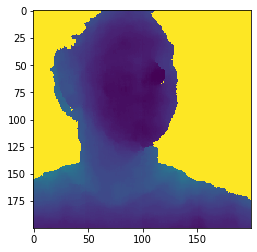

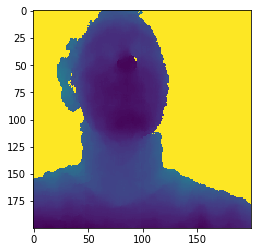

[[[ 0.13757415  0.13757415  0.13757415 ...  0.13757415  0.13757415
    0.13757415]
  [ 0.13757415  0.13757415  0.13757415 ...  0.13757415  0.13757415
    0.13757415]
  [ 0.13757415  0.13757415  0.13757415 ...  0.13757415  0.13757415
    0.13757415]
  ...
  [-0.12075917 -0.12075917 -0.12075917 ... -0.11075918 -0.11075918
   -0.11075918]
  [-0.12242584 -0.12242584 -0.12242584 ... -0.11325917 -0.11325917
   -0.11075918]
  [-0.12409251 -0.12409251 -0.12409251 ... -0.11325917 -0.11492584
   -0.11325917]]

 [[ 0.11797486  0.11797486  0.11797486 ...  0.11797486  0.11797486
    0.11797486]
  [ 0.11797486  0.11797486  0.11797486 ...  0.11797486  0.11797486
    0.11797486]
  [ 0.11797486  0.11797486  0.11797486 ...  0.11797486  0.11797486
    0.11797486]
  ...
  [-0.14202514 -0.14369181 -0.14369181 ... -0.11869181 -0.11869181
   -0.11619181]
  [-0.14369181 -0.14619182 -0.14619182 ... -0.11869181 -0.11869181
   -0.11869181]
  [-0.14952515 -0.14785849 -0.14785849 ... -0.11869181 -0.11869181
   -0.

In [0]:
# Checking method
print(create_couple("trainset/"))

In [0]:
# This method create same person by .bmp
# RGBA + depth

def create_couple_rgbd(file_path):
    # This line is same above create_couple(file_path)
    folder=np.random.choice(glob.glob(file_path + "*"))
    while folder == "faceid":
      folder=np.random.choice(glob.glob(file_path + "*"))
      
    mat1=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue
                # Finding a depth by pixel value
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat1[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat1 = np.asarray(mat1)
        
    mat1_small=mat1[140:340,220:420]
    
    img1 = Image.open(depth_file[:-5] + "c.bmp")
    # Protecting from image crash
    img1.thumbnail((640,480))
    img1 = np.asarray(img1)
    img1 = img1[140:340,220:420]
    # Scaling
    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)
    
    plt.imshow(mat1_small)
    plt.show()
    plt.imshow(img1)
    plt.show()
    
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue
                # Finding a depth by pixel value
                if int(val) > 1200 or int(val) == -1:
                  val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
        
    mat2_small=mat2[140:340,220:420]
    img2 = Image.open(depth_file[:-5] + "c.bmp")
    # Protecting from image crash
    img2.thumbnail((640,480))
    img2 = np.asarray(img2)
    img2 = img2[160:360,240:440]
    # Scaling
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
   
    plt.imshow(mat2_small)
    plt.show()
    plt.imshow(img2)
    plt.show()
    
    full1 = np.zeros((200,200,4))
    full1[:,:,:3] = img1[:,:,:3]
    full1[:,:,3] = mat1_small
    
    full2 = np.zeros((200,200,4))
    full2[:,:,:3] = img2[:,:,:3]
    full2[:,:,3] = mat2_small
    return  np.array([full1, full2])
  # folder[-7:-1]

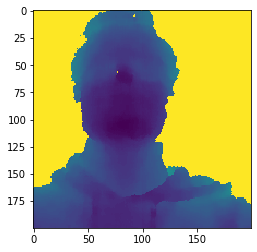

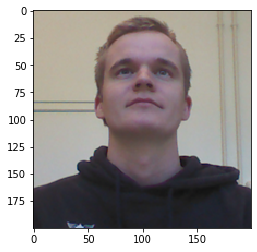

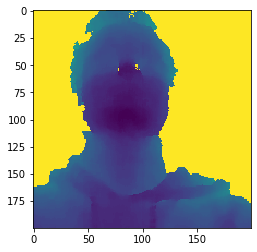

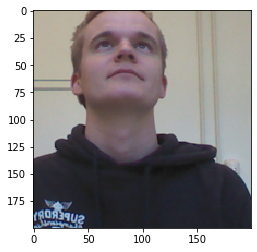

array([[[[ 1.87000000e+02,  1.75000000e+02,  1.57000000e+02,
           1.02925822e-01],
         [ 1.87000000e+02,  1.76000000e+02,  1.58000000e+02,
           1.02925822e-01],
         [ 1.89000000e+02,  1.76000000e+02,  1.58000000e+02,
           1.02925822e-01],
         ...,
         [ 1.70000000e+02,  1.66000000e+02,  1.49000000e+02,
           1.02925822e-01],
         [ 1.71000000e+02,  1.65000000e+02,  1.49000000e+02,
           1.02925822e-01],
         [ 1.70000000e+02,  1.67000000e+02,  1.49000000e+02,
           1.02925822e-01]],

        [[ 1.86000000e+02,  1.76000000e+02,  1.58000000e+02,
           1.02925822e-01],
         [ 1.86000000e+02,  1.76000000e+02,  1.58000000e+02,
           1.02925822e-01],
         [ 1.89000000e+02,  1.75000000e+02,  1.57000000e+02,
           1.02925822e-01],
         ...,
         [ 1.70000000e+02,  1.65000000e+02,  1.49000000e+02,
           1.02925822e-01],
         [ 1.71000000e+02,  1.65000000e+02,  1.49000000e+02,
           1.029258

In [0]:
create_couple_rgbd("trainset/")

In [0]:
# This method create other person by .dat(this file encodes data value, -1 ~ 4095)
# Depth-only

def create_wrong(file_path):
    # This line is same above create_couple(file_path)
    folder=np.random.choice(glob.glob(file_path + "*"))
    while folder == "faceid":
      folder=np.random.choice(glob.glob(file_path + "*"))
      #print(folder)
      
    mat1=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue
                # Finding a depth by data value
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat1[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat1 = np.asarray(mat1)
    mat1_small=mat1[140:340,220:420]
    # Scaling
    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)
    plt.imshow(mat1_small)
    plt.show()
    
    folder2=np.random.choice(glob.glob(file_path + "*"))
    # Activates if it chose the same folder
    while folder==folder2 or folder2=="faceid": 
        folder2=np.random.choice(glob.glob(file_path + "*"))
    
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder2 + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n":
                  continue
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
        
    mat2_small=mat2[140:340,220:420]
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(mat2_small)
    plt.show()
      
    return np.array([mat1_small, mat2_small])

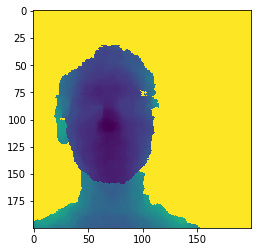

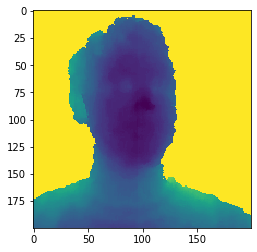

array([[[ 0.05234721,  0.05234721,  0.05234721, ...,  0.05234721,
          0.05234721,  0.05234721],
        [ 0.05234721,  0.05234721,  0.05234721, ...,  0.05234721,
          0.05234721,  0.05234721],
        [ 0.05234721,  0.05234721,  0.05234721, ...,  0.05234721,
          0.05234721,  0.05234721],
        ...,
        [-0.05681946, -0.05681946, -0.05681946, ...,  0.05234721,
          0.05234721,  0.05234721],
        [-0.05931946, -0.05931946, -0.05931946, ...,  0.05234721,
          0.05234721,  0.05234721],
        [-0.06181946, -0.06181946, -0.06181946, ...,  0.05234721,
          0.05234721,  0.05234721]],

       [[ 0.06637278,  0.06637278,  0.06637278, ...,  0.06637278,
          0.06637278,  0.06637278],
        [ 0.06637278,  0.06637278,  0.06637278, ...,  0.06637278,
          0.06637278,  0.06637278],
        [ 0.06637278,  0.06637278,  0.06637278, ...,  0.06637278,
          0.06637278,  0.06637278],
        ...,
        [-0.06112722, -0.06112722, -0.06362722, ..., -

In [0]:
create_wrong("trainset/")

In [0]:
# This method create other person by .bmp
# RGBA + depth

def create_wrong_rgbd(file_path):
    folder=np.random.choice(glob.glob(file_path + "*"))
    while folder == "faceid":
      folder=np.random.choice(glob.glob(file_path + "*"))    
    
    mat1=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat1[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat1 = np.asarray(mat1)
        
    mat1_small=mat1[140:340,220:420]
    img1 = Image.open(depth_file[:-5] + "c.bmp")
    # Protecting from image crash
    img1.thumbnail((640,480))
    img1 = np.asarray(img1)
    img1 = img1[140:340,220:420]
    # Scaling
    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)
    plt.imshow(img1)
    plt.show()
    plt.imshow(mat1_small)
    plt.show()
    
    folder2=np.random.choice(glob.glob(file_path + "*"))
    # Activates if it chose the same folder
    while folder==folder2 or folder2=="faceid":
        folder2=np.random.choice(glob.glob(file_path + "*"))
        
    mat2=np.zeros((480,640), dtype='float32')
    i=0
    j=0
    
    depth_file = np.random.choice(glob.glob(folder2 + "/*.dat"))
    
    with open(depth_file) as file:
        for line in file:
            vals = line.split('\t')
            for val in vals:
                if val == "\n": 
                  continue 
                if int(val) > 1200 or int(val) == -1: 
                  val= 1200
                mat2[i][j]=float(int(val))
                j+=1
                j=j%640

            i+=1
        mat2 = np.asarray(mat2)
        
    mat2_small=mat2[140:340,220:420]
    img2 = Image.open(depth_file[:-5] + "c.bmp")
    # Protecting from image crash
    img2.thumbnail((640,480))
    img2 = np.asarray(img2)
    img2 = img2[140:340,220:420]
    # Scaling
    mat2_small=(mat2_small-np.mean(mat2_small))/np.max(mat2_small)
    plt.imshow(img2)
    plt.show()
    plt.imshow(mat2_small)
    plt.show()
    
    full1 = np.zeros((200,200,4))
    full1[:,:,:3] = img1[:,:,:3]
    full1[:,:,3] = mat1_small
    
    full2 = np.zeros((200,200,4))
    full2[:,:,:3] = img2[:,:,:3]
    full2[:,:,3] = mat2_small
    return (folder[-7:-1],folder2[-7:-1]), np.array([full1, full2])

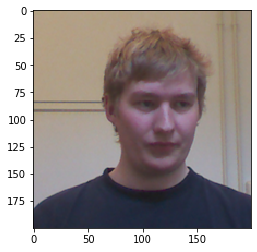

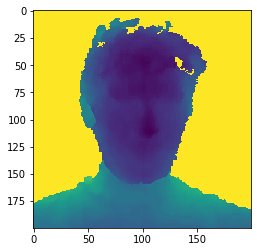

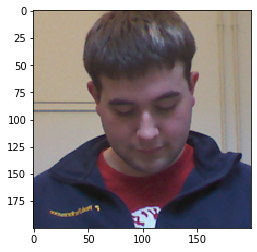

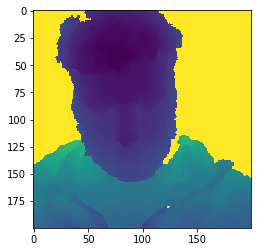

(('142457', '134757'),
 array([[[[ 1.80000000e+02,  1.62000000e+02,  1.25000000e+02,
            8.53093490e-02],
          [ 1.80000000e+02,  1.61000000e+02,  1.28000000e+02,
            8.53093490e-02],
          [ 1.80000000e+02,  1.62000000e+02,  1.33000000e+02,
            8.53093490e-02],
          ...,
          [ 1.59000000e+02,  1.44000000e+02,  1.27000000e+02,
            8.53093490e-02],
          [ 1.61000000e+02,  1.43000000e+02,  1.26000000e+02,
            8.53093490e-02],
          [ 1.62000000e+02,  1.41000000e+02,  1.26000000e+02,
            8.53093490e-02]],
 
         [[ 1.79000000e+02,  1.61000000e+02,  1.24000000e+02,
            8.53093490e-02],
          [ 1.79000000e+02,  1.61000000e+02,  1.28000000e+02,
            8.53093490e-02],
          [ 1.79000000e+02,  1.61000000e+02,  1.33000000e+02,
            8.53093490e-02],
          ...,
          [ 1.58000000e+02,  1.43000000e+02,  1.27000000e+02,
            8.53093490e-02],
          [ 1.59000000e+02,  1.420

In [0]:
# (200, 200, 4)
create_wrong_rgbd("trainset/")

In [0]:
import os

train_num = os.listdir('./trainset')
# 26
for i in range(len(train_num)):
  train_num[i] = train_num[i][-7:-1]
  
# 5
test_num = os.listdir('./testset')
for i in range(len(test_num)):
  test_num[i] = test_num[i][-7:-1]


from itertools import combinations

p = list(combinations(train_num,2))
p2 = list(combinations(test_num,2))


In [0]:
trainset = []

count1 = 0
count2 = 0
set1 = set()
set2 = set()

X = []
y = []

# Positive set
while count1 != len(train_num):
  tmp = create_couple_rgbd("trainset/")
  X.append(tmp[1].reshape((2, 200, 200, 4)))
  y.append(np.array([0.]))
  set1.add(tmp[0])
  count1 = len(set1)

# Negative set
while count2 != len(p):
  tmp = create_wrong_rgbd("trainset/")
  X.append(tmp[1].reshape((2, 200, 200, 4)))
  y.append(np.array([1.]))
  set2.add(tmp[0])
  count2 = len(set2)

  
X = np.asarray(X)
y = np.asarray(y)
trainset.append(([X[:, 0], X[:, 1]], y))

In [0]:
testset = []

count1 = 0
count2 = 0
set1 = set()
set2 = set()

X = []
y = []

# Positive set
while count1 != len(test_num):
  tmp = create_couple_rgbd("testset/")
  X.append(tmp[1].reshape((2, 200, 200, 4)))
  y.append(np.array([0.]))
  set1.add(tmp[0])
  count1 = len(set1)

# Negative set
while count2 != len(p):
  tmp = create_wrong_rgbd("testset/")
  X.append(tmp[1].reshape((2, 200, 200, 4)))
  y.append(np.array([1.]))
  set2.add(tmp[0])
  count2 = len(set2)

  
X = np.asarray(X)
y = np.asarray(y)
testset.append(([X[:, 0], X[:, 1]], y))

#4. Dataset & Dataloader

- A simple class to manage configuration

In [0]:
class Config():
    training_dir = "./trainset/"
    testing_dir = "./testset/"
    saving_dir = "./save/"
    train_batch_size = 32
    train_number_epochs = 10

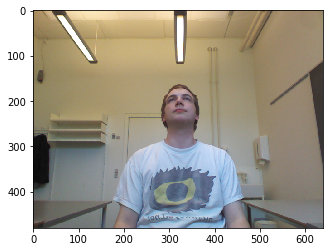

(200, 200, 4)


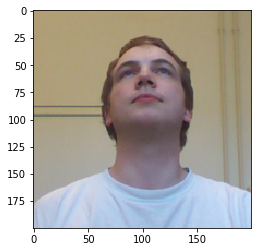

'\n    img1.thumbnail((640,480))\n    img1 = np.asarray(img1)\n    img1 = img1[140:340,220:420]\n    # Scaling\n    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)\n    \n    #plt.imshow(mat1_small)\n    #plt.show()\n    #plt.imshow(img1)\n    #plt.show()\n    '

In [0]:
img = Image.open(Config.training_dir + "(2012-05-16)(151751)/001_1_c.bmp")
img.thumbnail((640,480))
plt.imshow(img)
plt.show()
img = np.asarray(img)
img = img[140:340,220:420]
print(img.shape)
plt.imshow(img)
plt.show()
'''
    img1.thumbnail((640,480))
    img1 = np.asarray(img1)
    img1 = img1[140:340,220:420]
    # Scaling
    mat1_small=(mat1_small-np.mean(mat1_small))/np.max(mat1_small)
    
    #plt.imshow(mat1_small)
    #plt.show()
    #plt.imshow(img1)
    #plt.show()
    '''

- Custom Dataset Class: This dataset generates a pair of images. 0 for geniune pair and 1 for imposter pair

In [0]:
class SiameseNetworkDataset(Dataset):
    
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset    
        self.transform = transform
        
    def __getitem__(self,index):
        
        #we need to make sure approx 50% of images are in the same class
        
        img0_tuple = random.choice(self.imageFolderDataset.imgs)
        
        # should_get_same_class 0 or 1
        should_get_same_class = random.randint(0, 1)
        
        # 1 for negative(different class)(same class)
        if should_get_same_class:
            while True:
                # keep looping till the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                
                if img0_tuple[1]==img1_tuple[1]:
                  
                    break
                    
        # 0 for positive(same class)
        else:
            while True:
                #keep looping till a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                
                if img0_tuple[1] !=img1_tuple[1]:
                    break
        
        img0 = Image.open(img0_tuple[0])
        img0.thumbnail((640,480))
        img0 = np.asarray(img0)
        # 224 * 224
        img0 = img0[128:352,208:432]
        # 256 * 256
        #img0 = img0[112:369,292:448]
        
        img1 = Image.open(img1_tuple[0])
        img1.thumbnail((640,480))
        img1 = np.asarray(img1)
        # 224 * 224
        img1 = img1[128:352,208:432]
        # 256 * 256
        #img1 = img1[112:369,292:448]
        
        
        '''
        if self.should_invert:
            img0 = PIL.ImageOps.invert(img0)
            img1 = PIL.ImageOps.invert(img1)
         '''
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
            
        return img0, img1 , torch.from_numpy(np.array([int(img1_tuple[1]!=img0_tuple[1])],dtype=np.float32))
    
    def __len__(self):
        return len(self.imageFolderDataset.imgs)

- Using Image Folder Dataset

In [0]:
folder_dataset = dset.ImageFolder(root = Config.training_dir)

siamese_dataset = SiameseNetworkDataset(imageFolderDataset = folder_dataset, transform = transforms.Compose([transforms.ToTensor()]))

- Visualising some of the data: The top row and the bottom row of any column is one pair. The 0s and 1s correspond to the column of the image. 1 indiciates dissimilar, and 0 indicates similar.

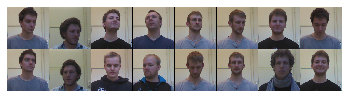

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [0]:
vis_dataloader = DataLoader(siamese_dataset, shuffle=True, num_workers=0, batch_size=8)

dataiter = iter(vis_dataloader)


example_batch = next(dataiter)


concatenated = torch.cat((example_batch[0],example_batch[1]),0)
concatenated = concatenated[:,0:3,:,:]

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

# 5. Network crafting
- Now we create the network. We first manually create the *constrative loss*, then we define the network architecture starting from the SqueezeNet architecture, and then using it as a siamese-network for embedding faces into a manifold. (the network for now is very *big* and could be heavily optimized, but I just wanted to show a proof-of-concept)

- ContrastiveLoss

In [0]:
# Loss function

class ContrastiveLoss(torch.nn.Module):

    def __init__(self, margin=1.):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
        
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive


'''
class ContrastiveLoss(nn.Module):
    """
    Contrastive loss
    Takes embeddings of two samples and a target label == 1 if samples are from the same class and label == 0 otherwise
    """

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.eps = 1e-9

    def forward(self, output1, output2, target, size_average=True):
        distances = (output2 - output1).pow(2).sum(1)  # squared distances
        losses = 0.5 * (target.float() * distances +
                        (1 + -1 * target).float() * F.relu(self.margin - (distances + self.eps).sqrt()).pow(2))
        return losses.mean() if size_average else losses.sum()
'''

'\nclass ContrastiveLoss(nn.Module):\n    """\n    Contrastive loss\n    Takes embeddings of two samples and a target label == 1 if samples are from the same class and label == 0 otherwise\n    """\n\n    def __init__(self, margin):\n        super(ContrastiveLoss, self).__init__()\n        self.margin = margin\n        self.eps = 1e-9\n\n    def forward(self, output1, output2, target, size_average=True):\n        distances = (output2 - output1).pow(2).sum(1)  # squared distances\n        losses = 0.5 * (target.float() * distances +\n                        (1 + -1 * target).float() * F.relu(self.margin - (distances + self.eps).sqrt()).pow(2))\n        return losses.mean() if size_average else losses.sum()\n'

In [0]:
class SiameseNetwork(nn.Module):
  
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        
        self.feature_extractor = nn.Sequential(
          # We change # of input channel 3 → 4
          nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        
          nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        
          nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        
        
          nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        
          nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        )
    
        #self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
    
        self.classifier = nn.Sequential(   
          nn.Linear(in_features=25088, out_features=4096, bias=True),
          nn.ReLU(inplace=True),
          nn.Dropout(p=0.5),
          nn.Linear(in_features=4096, out_features=4096, bias=True),
          nn.ReLU(inplace=True),
          nn.Dropout(p=0.5),
          nn.Linear(in_features=4096, out_features=1000, bias=True)
        )
      
    def forward_once(self, x):
      output = self.feature_extractor(x)
      #output = self.avgpool(x)
      output = output.view(output.size()[0], -1)
      output = self.classifier(output)
      return output

    def forward(self, input1, input2):
      output1 = self.forward_once(input1)
      output2 = self.forward_once(input2)
      return output1, output2

# 5. Learning
- We write the generators that will give our model batches of data to train on, then we run the training.

In [0]:
train_dataloader = DataLoader(siamese_dataset, shuffle=True, num_workers=0, batch_size=Config.train_batch_size)

net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
# 0.0005
optimizer = optim.Adam(net.parameters(),lr = 0.0005)

counter = []
loss_history = [] 
iteration_number= 0

Epoch number 0
 Current loss 0.3512023091316223

Epoch number 0
 Current loss 0.24548926949501038

Epoch number 0
 Current loss 0.24936607480049133

Epoch number 0
 Current loss 0.26734459400177

Epoch number 0
 Current loss 0.2604709267616272

Epoch number 1
 Current loss 0.2698827385902405

Epoch number 1
 Current loss 0.2780945897102356

Epoch number 1
 Current loss 0.2437782883644104

Epoch number 1
 Current loss 0.26126062870025635

Epoch number 1
 Current loss 0.27275514602661133

Epoch number 2
 Current loss 0.25506192445755005

Epoch number 2
 Current loss 0.25449100136756897

Epoch number 2
 Current loss 0.299069344997406

Epoch number 2
 Current loss 0.24239864945411682

Epoch number 2
 Current loss 0.2592746317386627

Epoch number 3
 Current loss 0.26140546798706055

Epoch number 3
 Current loss 0.2391577661037445

Epoch number 3
 Current loss 0.2447754442691803

Epoch number 3
 Current loss 0.2712920010089874

Epoch number 3
 Current loss 0.272782564163208

Epoch number 4
 

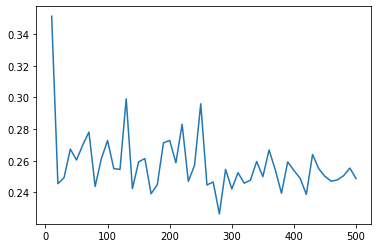

In [0]:
for epoch in range(0,Config.train_number_epochs):
    
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
        
        optimizer.zero_grad()
        
        output1,output2 = net(img0,img1)
        
        loss_contrastive = criterion(output1,output2,label)
        
        loss_contrastive.backward()
        
        optimizer.step()
        
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
            
show_plot(counter,loss_history)

# 6. Some model tests

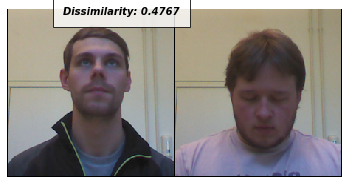

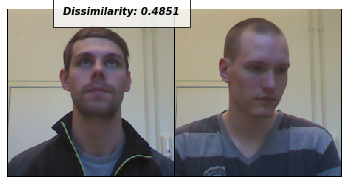

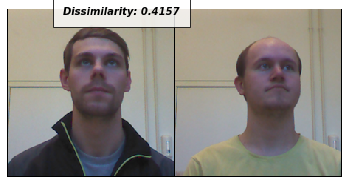

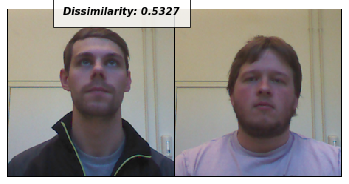

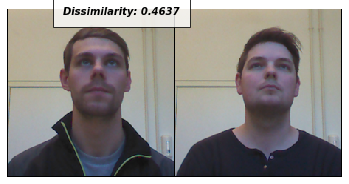

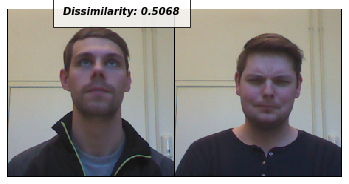

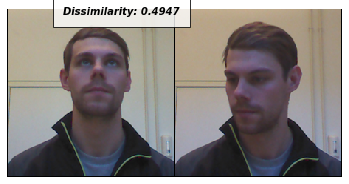

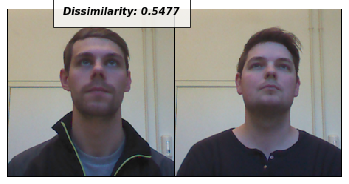

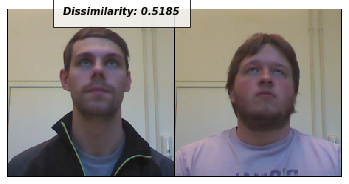

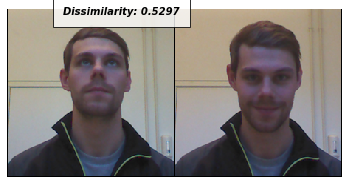

In [0]:
folder_dataset_test = dset.ImageFolder(root=Config.testing_dir)

siamese_dataset = SiameseNetworkDataset(imageFolderDataset = folder_dataset_test,transform = transforms.Compose([transforms.ToTensor()]))

test_dataloader = DataLoader(siamese_dataset,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)
x0,_,_ = next(dataiter)

'''
example_batch = next(dataiter)


concatenated = torch.cat((example_batch[0],example_batch[1]),0)
concatenated = concatenated[:,0:3,:,:]

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())
'''

for i in range(10):
    _,x1,label2 = next(dataiter)
    
    concatenated = torch.cat((x0,x1),0)
    concatenated = concatenated[:,0:3,:,:]
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.4f}'.format(euclidean_distance.item()))

#  7. Saving and loading the model

In [0]:
# Print model's state_dict

print("Model's state_dict:")
for param_tensor in net.state_dict():
  print(param_tensor, "\t", net.state_dict()[param_tensor].size())
  
# Print optimizer's state_dict

print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
feature_extractor.0.weight 	 torch.Size([64, 4, 3, 3])
feature_extractor.0.bias 	 torch.Size([64])
feature_extractor.2.weight 	 torch.Size([64, 64, 3, 3])
feature_extractor.2.bias 	 torch.Size([64])
feature_extractor.5.weight 	 torch.Size([128, 64, 3, 3])
feature_extractor.5.bias 	 torch.Size([128])
feature_extractor.7.weight 	 torch.Size([128, 128, 3, 3])
feature_extractor.7.bias 	 torch.Size([128])
feature_extractor.10.weight 	 torch.Size([256, 128, 3, 3])
feature_extractor.10.bias 	 torch.Size([256])
feature_extractor.12.weight 	 torch.Size([256, 256, 3, 3])
feature_extractor.12.bias 	 torch.Size([256])
feature_extractor.14.weight 	 torch.Size([256, 256, 3, 3])
feature_extractor.14.bias 	 torch.Size([256])
feature_extractor.17.weight 	 torch.Size([512, 256, 3, 3])
feature_extractor.17.bias 	 torch.Size([512])
feature_extractor.19.weight 	 torch.Size([512, 512, 3, 3])
feature_extractor.19.bias 	 torch.Size([512])
feature_extractor.21.weight 	 torch.Size([512, 512,

- Saving & Loading Model for Inference

In [1]:
# Saving
torch.save(net.state_dict(), Config.saving_dir)

# Loading
'''
net = TheModelClass(*args, **kwargs)
net.load_state_dict(torch.load(Config.saving_dir))
net.eval()
'''

NameError: ignored

- Save/Load Entire Model

In [0]:
# Saving
torch.save(net, Config.saving_dir+ "test_model.pth")

# Loading (Model class must be defined somewhere)
'''
net = torch.load(Config.saving_dir)
net.eval()
'''

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SiameseNetwork. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3

'\nnet = torch.load(Config.saving_dir)\nnet.eval()\n'